In [89]:
import pandas as pd
import string
import nltk
import numpy as np
import joblib
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [90]:
#dataset loading

df = pd.read_csv('/root/gpu_project/NLP-assignment-2/spam.csv', encoding='latin-1')

#keeping required columns only and renaming them
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

print("Dataset loaded successfully.")
print("Dataset preview:\n", df.head())

Dataset loaded successfully.
Dataset preview:
   label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [ ]:
#loading Bow multinomial NB model and vectorizer

model_1 = joblib.load('/root/gpu_project/NLP-assignment-2/Bow-Model-files/nb_multinomial_model.joblib')
vectorizer_1 = joblib.load('/root/gpu_project/NLP-assignment-2/Bow-Model-files/nb_multinomial_vectorizer.joblib')

#loading Tf-idf complement NB model and vectorizer

model_2 = joblib.load('/root/gpu_project/NLP-assignment-2/tf-idf-model-files/nb_complement_model.joblib')
vectorizer_2 = joblib.load('/root/gpu_project/NLP-assignment-2/tf-idf-model-files/nb_complement_vectorizer.joblib')

In [93]:
X1=vectorizer_1.transform(df['message'])
y1 = df['label'].map({'spam': 1, 'ham': 0})
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

X2=vectorizer_1.transform(df['message'])
y2 = df['label'].map({'spam': 1, 'ham': 0})
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)


In [94]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\nEvaluating the '{model_name}' model...")
 
    print(f"\n{model_name} Results:")
    print("-" * 50)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("\n--- Model Evaluation Results ---")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")


    return accuracy, precision, recall, f1

In [95]:
y_pred_bow= model_1.predict(X_test)
y_pred_tfidf = model_2.predict(X_test)




Confusion Matrices:


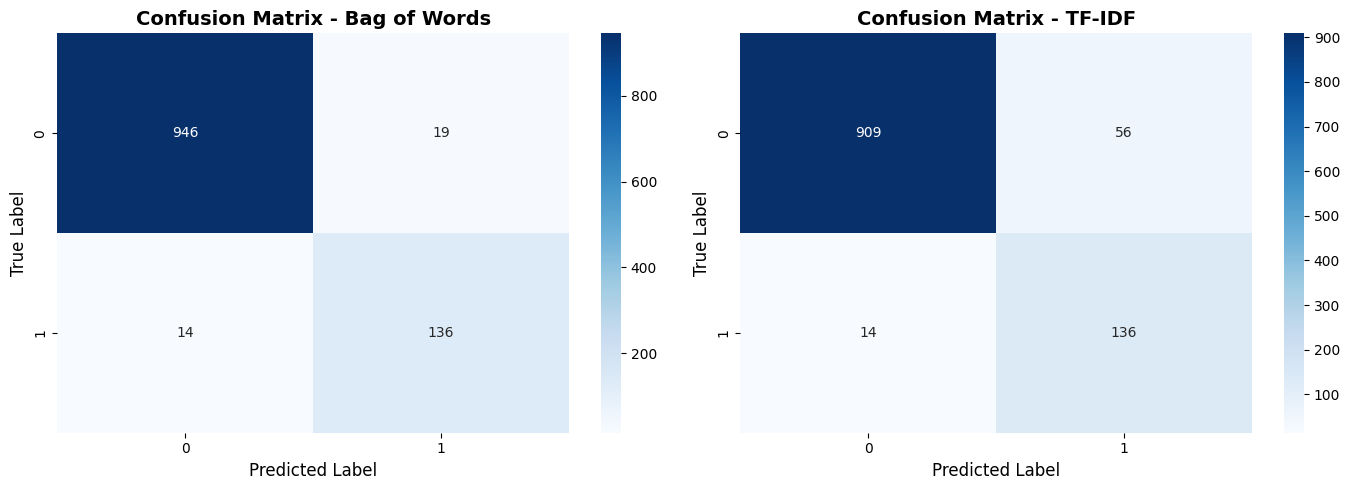

In [96]:
# Confusion matrices for Bag of Words and TF-IDF
print("\nConfusion Matrices:")

cm_bow = confusion_matrix(y_test, y_pred_bow)
cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)

# Determine unique label count
classes = sorted(list(set(y_test)))

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- Bag of Words Confusion Matrix ---
sns.heatmap(cm_bow, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=classes, yticklabels=classes)
axes[0].set_title('Confusion Matrix - Bag of Words', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Predicted Label', fontsize=12)
axes[0].set_ylabel('True Label', fontsize=12)

# --- TF-IDF Confusion Matrix ---
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Blues', ax=axes[1],
            xticklabels=classes, yticklabels=classes)
axes[1].set_title('Confusion Matrix - TF-IDF', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Predicted Label', fontsize=12)
axes[1].set_ylabel('True Label', fontsize=12)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [97]:
def print_classification_report(y_true, y_pred, model_name):
    print(f"\nClassification Report for '{model_name}':")

    print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))
    print("--------------------------------")
 

In [98]:
# classification report for both models
class_bow = print_classification_report(y_test, y_pred_bow, "Bag of Words Model")
class_tfidf = print_classification_report(y_test, y_pred_tfidf, "TF-IDF Model")


Classification Report for 'Bag of Words Model':
              precision    recall  f1-score   support

         Ham       0.99      0.98      0.98       965
        Spam       0.88      0.91      0.89       150

    accuracy                           0.97      1115
   macro avg       0.93      0.94      0.94      1115
weighted avg       0.97      0.97      0.97      1115

--------------------------------

Classification Report for 'TF-IDF Model':
              precision    recall  f1-score   support

         Ham       0.98      0.94      0.96       965
        Spam       0.71      0.91      0.80       150

    accuracy                           0.94      1115
   macro avg       0.85      0.92      0.88      1115
weighted avg       0.95      0.94      0.94      1115

--------------------------------


In [100]:
# text preprocessing
def preprocess_text(text):
    """
    1. convert text to lowercase.
    2. tokenize the text.
    3. remove punctuation.
    4. remove stopwords.
    5. return a clean list of words.
    """
    
    # 1. Lowercase
    text = text.lower()

    # 2. Tokenize
    tokens = word_tokenize(text)

    # 3. remove punctuation and non-alphanumeric characters
    words = [word for word in tokens if word.isalnum()]

    # 4. remove stopwords
    stop_words = set(stopwords.words('english'))
    clean_words = [word for word in words if word not in stop_words]

    # join the words into single string
    return " ".join(clean_words)


In [101]:
def predict_message(message):
    """Predicts if a new message is spam or ham."""
    clean_message = preprocess_text(message)
    message_vector = vectorizer_1.transform([clean_message])
    prediction = model_1.predict(message_vector)
    return "Spam" if prediction[0] == 1 else "Ham"

def predict_message2(message):
    """Predicts if a new message is spam or ham."""
    clean_message = preprocess_text(message)
    message2_vector = vectorizer_2.transform([clean_message])
    prediction = model_2.predict(message2_vector)
    return "Spam" if prediction[0] == 1 else "Ham"

In [102]:
print("\n--- Testing with new messages ---")
test_message_1 = "Congratulations! You have won a car in lucky draw."
print(f"Message: '{test_message_1}'")
print(f"Prediction-BoW: {predict_message(test_message_1)}\n")
print(f"Prediction-Tfidf: {predict_message2(test_message_1)}\n")
test_message_2 = "Hey, are we still on for the meeting tomorrow at 2 PM?"
print(f"Message: '{test_message_2}'")
print(f"Prediction-BoW: {predict_message(test_message_2)}")
print(f"Prediction-Tfidf: {predict_message2(test_message_2)}")
print("--------------------------------")


--- Testing with new messages ---
Message: 'Congratulations! You have won a car in lucky draw.'
Prediction-BoW: Spam

Prediction-Tfidf: Spam

Message: 'Hey, are we still on for the meeting tomorrow at 2 PM?'
Prediction-BoW: Ham
Prediction-Tfidf: Ham
--------------------------------
